# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#Create the Urban city DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [4]:
#Create the Suburban city DataFrame
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [5]:
#Create the Rural city DataFrame
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [107]:
#  1. Get the total rides for each city type
##for Urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_total = urban_ride_count.sum()

##for Suburban cities
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_total = suburban_ride_count.sum()

##for Rural cities
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_total = rural_ride_count.sum()

print(f'Total number of rides for urban cities is {urban_ride_total}')
print(f'Total number of rides for suburban cities is {suburban_ride_total}' )
print(f'Total number of rides for rural cities is {rural_ride_total}')

#Create a series for total ride by city type
total_ride_byType = (rural_ride_total, suburban_ride_total, urban_ride_total)

print(total_ride_byType)

Total number of rides for urban cities is 1625
Total number of rides for suburban cities is 625
Total number of rides for rural cities is 125
(125, 625, 1625)


In [108]:
# 2. Get the total drivers for each city type
##for Urban cities
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_total = int(urban_driver_count.sum())

##for Suburban cities
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_total = int(suburban_driver_count.sum())

##for Rural cities
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_total = int(rural_driver_count.sum())

print(f'Total number of drivers for urban cities is {urban_driver_total}')
print(f'Total number of drivers for suburban cities is {suburban_driver_total}' )
print(f'Total number of drivers for rural cities is {rural_driver_total}')

#create a series for total drivers by city type
total_drivers_byType = (rural_driver_total, suburban_driver_total, urban_driver_total)


Total number of drivers for urban cities is 2405
Total number of drivers for suburban cities is 490
Total number of drivers for rural cities is 78


In [88]:
type(urban_driver_total)

int

In [109]:
#  3. Get the total amount of fares for each city type
##for Urban cities.
urban_total_fare = urban_cities_df.groupby(["city"]).sum()["fare"]
urban_fare_total = urban_total_fare.sum()

##for Suburban cities.
suburban_total_fare = suburban_cities_df.groupby(["city"]).sum()["fare"]
suburban_fare_total = suburban_total_fare.sum()

##for Rural cities
rural_total_fare = rural_cities_df.groupby(["city"]).sum()["fare"]
rural_fare_total = rural_total_fare.sum()

print(f'Total number of fare for urban cities is {urban_fare_total:.2f}')
print(f'Total number of fare for suburban cities is {suburban_fare_total:.2f}' )
print(f'Total number of fare for rural cities is {rural_fare_total:.2f}')

#create a series for total amount of fare by city type
total_fare_byType = (rural_fare_total, suburban_fare_total, urban_fare_total)

Total number of fare for urban cities is 39854.38
Total number of fare for suburban cities is 19356.33
Total number of fare for rural cities is 4327.93


In [110]:
#  4. Get the average fare per ride for each city type. 
##for urban cities
urban_averagefare_ride = urban_fare_total / urban_ride_total

##for suburban cities
suburban_averagefare_ride = suburban_fare_total / suburban_ride_total

##for rural cities
rural_averagefare_ride = rural_fare_total / rural_ride_total

print(f'Average fare per ride for urban cities is {urban_averagefare_ride:.2f}')
print(f'Average fare per ride for suburban cities is {suburban_averagefare_ride:.2f}' )
print(f'Average fare per ride for rural cities is {rural_averagefare_ride:.2f}')

#create a series for average fare per ride for city type

averagefare_perRide_byType = (rural_averagefare_ride, suburban_averagefare_ride, urban_averagefare_ride)

Average fare per ride for urban cities is 24.53
Average fare per ride for suburban cities is 30.97
Average fare per ride for rural cities is 34.62


In [111]:
# 5. Get the average fare per driver for each city type. 
##for Urban cities
urban_averagefare_driver = urban_fare_total / urban_driver_total

##for suburban cities
suburban_averagefare_driver = suburban_fare_total / suburban_driver_total

##for rural cities
rural_averagefare_driver = rural_fare_total / rural_driver_total

print(f'Average fare per driver for urban cities is {urban_averagefare_driver:.2f}')
print(f'Average fare per driver for suburban cities is {suburban_averagefare_driver:.2f}' )
print(f'Average fare per driver for rural cities is {rural_averagefare_driver:.2f}')

#create a series for average fare per driver for city type
averagefare_perDriver_byType = (rural_averagefare_driver, suburban_averagefare_driver, urban_averagefare_driver)

Average fare per driver for urban cities is 16.57
Average fare per driver for suburban cities is 39.50
Average fare per driver for rural cities is 55.49


In [112]:
#city_type = pyber_data_df['type'].unique()
city_type = ("Rural", "Suburban", "Urban")

In [113]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"type": city_type, 
                                     "Total Rides": total_ride_byType, 
                                     "Total Drivers": total_drivers_byType, 
                                     "Total Fares": total_fare_byType,
                                     "Average Fare per Ride": averagefare_perRide_byType,
                                     "Average Fare per Driver": averagefare_perDriver_byType})

pyber_summary_df

,type,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
0,Rural,125,78,4327.93,34.623440,55.486282
1,Suburban,625,490,19356.33,30.970128,39.502714
2,Urban,1625,2405,39854.38,24.525772,16.571468


In [114]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.set_index("type", inplace = True)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [115]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)
pyber_summary_df.index.name = None

In [116]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,$4327.93,$34.62,$55.49
Suburban,625,490,$19356.33,$30.97,$39.50
Urban,"1,625","2,405",$39854.38,$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [97]:
# 1. Read the merged DataFrame
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [98]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_of_fares_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
sum_of_fares_df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [55]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
sum_of_fares_df = sum_of_fares_df.reset_index()
sum_of_fares_df

,index,date,type,fare
0,0,2019-01-01 09:45:36,Rural,43.69
1,1,2019-01-02 11:18:32,Rural,52.12
2,2,2019-01-03 19:51:01,Rural,19.90
3,3,2019-01-04 03:31:26,Rural,24.88
4,4,2019-01-06 07:38:40,Rural,47.33
...,...,...,...,...
2370,2370,2019-05-08 04:20:00,Urban,21.99
2371,2371,2019-05-08 04:39:49,Urban,18.45
2372,2372,2019-05-08 07:29:01,Urban,18.55
2373,2373,2019-05-08 11:38:35,Urban,19.77


In [57]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
sum_of_fares_pivot = sum_of_fares_df.pivot(index = "date", columns = "type", values = "fare")
sum_of_fares_pivot.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [61]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
dates_df = sum_of_fares_pivot.loc['2019-01-01':'2019-04-29']
dates_df


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [62]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
dates_df.index = pd.to_datetime(dates_df.index)

In [63]:
# 7. Check that the datatype for the index is datetime using df.info()
dates_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [65]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
final_df = dates_df.resample("W").sum()

<function matplotlib.pyplot.show(close=None, block=None)>

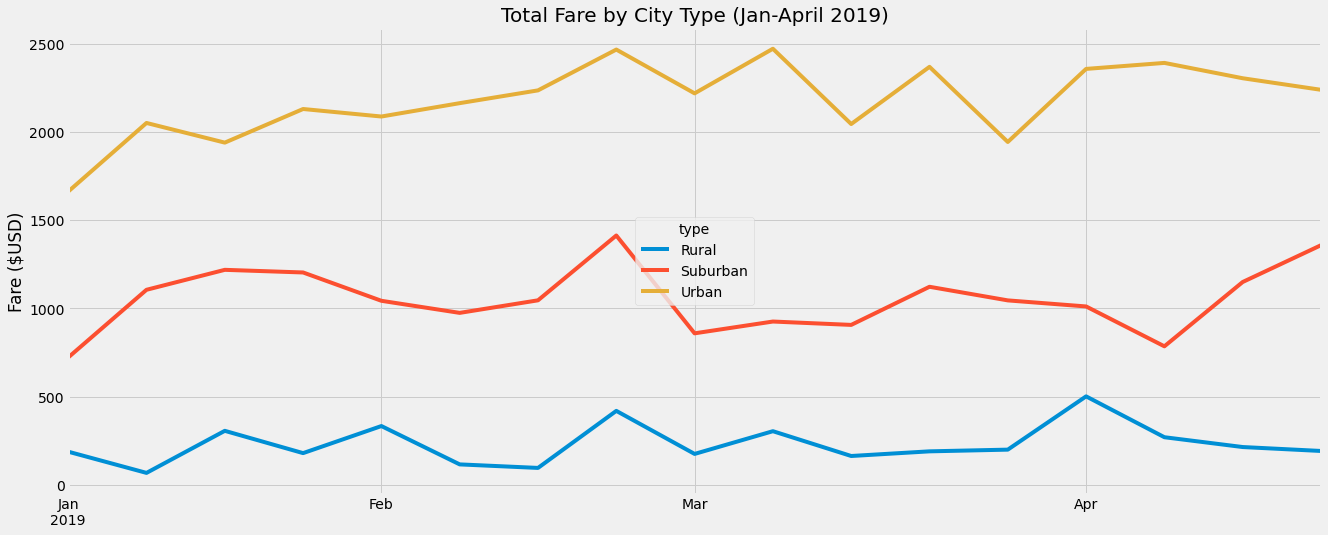

In [101]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
ax = final_df.plot(figsize=(20,8))

#set y-axis label, add title, legend, remove x-axis label
ax.set_ylabel("Fare ($USD)")
ax.set_title("Total Fare by City Type (Jan-April 2019)", fontsize = 20)
lgnd = ax.legend(loc = "center", title ="type")
x_axis = ax.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

#Save figure
plt.savefig("analysis/PyBer_challenge_fig.png")
plt.show